## Library and Data Import

In [1]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import cm
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
# Read Data
df = pd.read_excel('~//Downloads//Health and Wellness Survey(1-71).xlsx')

In [3]:
df.head()
# Drop first 5 meta-data columns added by MS-Forms
df = df.drop(df.columns[:5], axis=1)

In [4]:
df.tail()

,Your Initials\n,What is your gender?,How old are you?,"Please select your current country, State (Province) of residence.",What is your occupation?,What is your culture background?,What is your annual income?,Have you ever been diagnosed with a mental health condition?\n(DSM 5 defines a mental health condition as a clinical manifestation of an individual's behavioral or emotional patterns)\n,Have you ever noticed any behavioral or emotional patterns?,How often have you experienced your symptoms?,Are you taking medication or have you been on medication if yes what?,Have you received any treatment for this condition?\n,Are you currently receiving any treatment ?\n,How does this condition affect your daily life?\n,What mental condition were you diagnosed with?\n,When was the last time you have experienced symptoms of PTSD?,Are you currently seeking any treatment for your PTSD?,How did the therapist approach support you in your therapeutic process?,How did it affect your day to day life?\n,What specific goals you would like to achieve through treatment for your PTSD?,What are your expectation from that treatment?,"In general, have you noticed any changes in your relationships with family, friends, workplace or other?\n",How does your sleep quality and quantity impact your mood and daily functioning?,Has it affected any change in your sleep patterns?,Has there been any sudden changes in your overall mood?,What kind of changes have you experienced ?,In general what else was affected by your PTSD symptoms?,Have you experienced any financial or employment difficulties as a result of your PTSD symptoms?,If you have a chance to use self-guided real-life scenario to overcome your PTSD would you use it?,How do you cope with triggers or symptoms of PTSD on a daily basis?,Are you comfortable seeking treatment for your PTSD?,What specific treatment or support do you feel would be most helpful for your PTSD symptoms?,Do you have any more concerns,When was the last time you have experienced symptoms of Anxiety?,Are you currently seeking any treatment for your Anxiety?,How did the therapist approach support you in your therapeutic process?2,How did it affect your day to day life?,What specific goals you would like to achieve through treatment for your Anxiety?,What are your expectation from that treatment?\n,"In general, have you noticed any changes in your relationships with family, friends, workplace or other?\n2",How does your sleep quality and quantity impact your mood and daily functioning?2,Has it affected any change in your sleep patterns?2,Has there been any sudden changes in your overall mood? 2,What kind of changes have you experienced ?2,In general what else was affected by your Anxiety symptoms?,Have you experienced any financial or employment difficulties as a result of your Anxiety symptoms?\n,If you have a chance to use self-guided real-life scenario to overcome your anxiety would you use it?,How do you cope with triggers or symptoms of Anxiety on a daily basis?,Are you comfortable seeking treatment for your Anxiety?,What specific treatment or support do you feel would be most helpful for your Anxiety symptoms?\n,Do you have any more concerns2,When was the last time you have experienced symptoms of Trauma?,Are you currently seeking any medical or therapeutic treatment for Trauma?\n,How did the therapist approach support you in your therapeutic process?3,How has the traumatic experience impacted your daily life?\n,What specific goals you would like to achieve through treatment?,What are your expectation from that treatment?2,"In general, have you noticed any changes in your relationships with family, friends, workplace or other?",How does your sleep quality and quantity impact your mood and daily functioning?3,Has it affected any change in your sleep patterns?3,Has there been any sudden changes in your overall mood? \n,What kind of changes you experienced?,In general what else was affected by your Trauma symptoms?,Have you experi

In [5]:
for q, a in zip(df.columns, df.iloc[68]):
    if type(a) != type(5.55):
        print(f"Question: {q}\nAnswer: {a}\n")

Question: Your Initials

Answer: KFN

Question: What is your gender?
Answer: Woman

Question: How old are you?
Answer: 36 - 50

Question: Please select your current country, State (Province) of residence.
Answer: Canada,Quebec

Question: What is your occupation?
Answer: Work

Question: What is your annual income?
Answer: > $60000

Question: Have you ever been diagnosed with a mental health condition?
(DSM 5 defines a mental health condition as a clinical manifestation of an individual's behavioral or emotional patterns)

Answer: No

Question: Have you ever noticed any behavioral or emotional patterns?
Answer: Anxiety

Question: When was the last time you have experienced symptoms of Anxiety?
Answer: < 1 year

Question: Are you currently seeking any treatment for your Anxiety?
Answer: No

Question: How did the therapist approach support you in your therapeutic process?2
Answer: Moderate

Question: How did it affect your day to day life?
Answer: Prone to more isolation;

Question: What s

In [6]:
column_names = [
    #General
    'initials', 'gender', 'age', 'address', 'occupation', 'ethnicity', 'income', 'have_prev_diagnosis', 'felt_condition', 
   'experienced_symptoms', 'medication_text', 'treatment_receieved_past', 'treatment_receieved_present',
   'daily_effect_general', 'mental_condition', 
    #PTSD
    'last_symptom_ptsd', 'present_treatment_ptsd', 'therapist_support_ptsd','daily_affect_ptsd',
    'goals_ptsd', 'expectations_ptsd', 'relationship_changes_ptsd', 'sleep_impact_ptsd',
    'sleep_patterns_ptsd', 'mood_general_ptsd', 'mood_change_ptsd', 'general_effect_text_ptsd', 'financial_ptsd',
    'chance_ptsd', 'cope_text_ptsd', 'comfortable_treatment_ptsd', 'helpful_treatment_text_ptsd', 
    'more_concerns_ptsd',
    #Anxiety
    'last_symptom_anxiety', 'present_treatment_anxiety', 'therapist_support_anxiety', 'daily_affect_anxiety', 
    'goals_anxiety', 'expectations_anxiety', 'relationship_changes_anxiety', 'sleep_impact_anxiety',
    'sleep_patterns_anxiety', 'mood_general_anxiety', 'mood_change_anxiety', 'general_effect_text_anxiety', 'financial_anxiety',
    'chance_anxiety', 'cope_text_anxiety', 'comfortable_treatment_anxiety', 'helpful_treatment_text_anxiety', 
    'more_concerns_anxiety',
    #Trauma
    'last_symptom_trauma', 'present_treatment_trauma', 'therapist_support_trauma', 'daily_affect_trauma',
    'goals_trauma', 'expectations_trauma', 'relationship_changes_trauma', 'sleep_impact_trauma',
    'sleep_patterns_trauma', 'mood_general_trauma', 'mood_change_trauma', 'general_effect_text_trauma', 'financial_trauma',
    'chance_trauma', 'cope_text_trauma', 'comfortable_treatment_trauma', 'helpful_treatment_text_trauma', 
    'more_concerns_trauma',
    #SUD
    'history_sud', 'present_treatment_sud', 'therapist_support_sud', 'daily_affect_sud',
    'goals_sud', 'expectations_sud', 'relationship_changes_sud', 'sleep_impact_sud',
    'sleep_patterns_sud', 'mood_general_sud', 'mood_change_sud', 'legal_issue_sud',  'financial_sud',
    'chance_sud', 'cope_text_sud', 'comfortable_treatment_sud', 'helpful_treatment_text_sud', 
    'more_concerns_sud',
    #Closing
    'feeling_present_text', 'preferred_therapy', 'share_text', 'feedback_text', 'consent_agreement', 'provider_email'
]

In [7]:
# Preserve column name to question mapping
column_question_map = {k:v for k,v in zip(column_names, df.columns)}
# Rename all columns
df.columns = column_names
#Anonymize Initials Column
import random
import string
letter = string.ascii_uppercase
df.initials = df.initials.apply(lambda val: random.choice(letter) + random.choice(letter))

# Preprocessing

In [8]:
unwanted_cols= ['initials', 'gender', 'address', 'felt_condition','occupation','ethnicity', 'income', 'have_prev_diagnosis','medication_text', 'daily_effect_general', 'mental_condition', 'preferred_therapy', 'consent_agreement', 'provider_email', 'legal_issue_sud']
requiered_column_names = list(filter(lambda x:'text' not in x and x not in unwanted_cols, column_names))
print(requiered_column_names)
print(f"\nTaking {len(requiered_column_names)} columns")

['age', 'experienced_symptoms', 'treatment_receieved_past', 'treatment_receieved_present', 'last_symptom_ptsd', 'present_treatment_ptsd', 'therapist_support_ptsd', 'daily_affect_ptsd', 'goals_ptsd', 'expectations_ptsd', 'relationship_changes_ptsd', 'sleep_impact_ptsd', 'sleep_patterns_ptsd', 'mood_general_ptsd', 'mood_change_ptsd', 'financial_ptsd', 'chance_ptsd', 'comfortable_treatment_ptsd', 'more_concerns_ptsd', 'last_symptom_anxiety', 'present_treatment_anxiety', 'therapist_support_anxiety', 'daily_affect_anxiety', 'goals_anxiety', 'expectations_anxiety', 'relationship_changes_anxiety', 'sleep_impact_anxiety', 'sleep_patterns_anxiety', 'mood_general_anxiety', 'mood_change_anxiety', 'financial_anxiety', 'chance_anxiety', 'comfortable_treatment_anxiety', 'more_concerns_anxiety', 'last_symptom_trauma', 'present_treatment_trauma', 'therapist_support_trauma', 'daily_affect_trauma', 'goals_trauma', 'expectations_trauma', 'relationship_changes_trauma', 'sleep_impact_trauma', 'sleep_patter

In [9]:
#reduced the columns to 19 in such a way where anxiety, ptsd, trauma and substance abuse data are grouped together 
data = []
for i, row in df.iterrows():
    r = row[['age', 'experienced_symptoms', 'treatment_receieved_past', 'treatment_receieved_present']].tolist()
    if(row.felt_condition == 'Anxiety' or row.mental_condition == 'Anxiety'):
        r.extend(row[[col for col in requiered_column_names if "anxiety" in col]])  
    elif(row.felt_condition == 'PTSD' or row.mental_condition == 'PTSD'):
        r.extend(row[[col for col in requiered_column_names if "ptsd" in col]])
    elif(row.felt_condition == 'Substance Abuse' or row.mental_condition == 'Substance Abuse'):
        r.extend(row[[col for col in requiered_column_names if "sud" in col]])
    else:
        r.extend(row[[col for col in requiered_column_names if "trauma" in col]])
    data.append(r)

In [10]:
df_new = pd.DataFrame(data)

In [11]:
print(f"Stacked same questions to reduce columns to {df_new.shape[1]}")

Stacked same questions to reduce columns to 19


In [12]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,18 - 35,Daily,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18 - 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18 - 35,Daily,Yes,Yes,> 1 year,No,A lot,Prone to more anger;Prone to more grief;Prone ...,To help me relax;To smile again;To have better...,To feel relax;To learn coping strategies ;To h...,No mostly at the workplace,Moderately,A little bit,Quite a bit,Anger/Frustration;Happiness/Euphoric;Sadness/D...,Not at all,"No, I need to stay active, no I am not interes...",Yes,Not Applicable
3,18 - 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 - 35,NaN,NaN,NaN,>1 year,No,Adequate,Prone to more isolation,To help me relax;To have better relationships;...,To feel relax;To learn coping strategies;To fe...,No not at all,Quite a bit,Quite a bit,Quite a bit,Sadness/Depressed;Overwhelmed/Stimulated;,Not at all,"Yes, I would use it daily",Yes,Not Applicable


In [13]:
new_column_names = ['age', 'experienced_symptoms', 'treatment_receieved_past', 'treatment_receieved_present',
                    'last_symptom', 'present_treatment', 'therapist_support', 'daily_affect', 
                    'goals', 'expectations','relationship_changes', 'sleep_impact', 
                    'sleep_patterns', 'mood_general', 'mood_change',
                    'financial', 'chance', 'comfortable_treatment', 'more_concerns']

In [14]:
df_new.columns = new_column_names

In [15]:
df_new.last_symptom = df_new.last_symptom.apply(lambda x: '> 1 year' if x == '>1 year' else x)
df_new.mood_general = df_new.mood_general.apply(lambda x: 'A little bit' if x == 'A little bit ' else x)

In [16]:
df_new.nunique()

age                             4
experienced_symptoms            4
treatment_receieved_past        2
treatment_receieved_present     2
last_symptom                    8
present_treatment               2
therapist_support              20
daily_affect                   26
goals                          23
expectations                   25
relationship_changes           18
sleep_impact                    6
sleep_patterns                  6
mood_general                    5
mood_change                    17
financial                       6
chance                          7
comfortable_treatment           2
more_concerns                   5
dtype: int64

In [17]:
df_new.last_symptom.value_counts()

< 3 months ago    22
> 1 year           9
< 6 months ago     9
< 1 year           4
> an year ago      1
>2 year            1
< 6 months         1
Week ago           1
Name: last_symptom, dtype: int64

In [18]:
df_new.financial.value_counts()

Not at all       21
Moderately       15
A little bit      6
Quite a bit       4
Not at all        1
A little bit      1
Name: financial, dtype: int64

In [19]:
from collections import Counter
Counter(df_new.last_symptom.values)

Counter({nan: 23,
         '> 1 year': 9,
         '< 3 months ago': 22,
         '< 6 months ago': 9,
         '> an year ago': 1,
         '< 1 year': 4,
         '>2 year': 1,
         '< 6 months\xa0': 1,
         'Week ago': 1})

In [20]:
df_new.last_symptom = df_new.last_symptom.apply(lambda x: '> 1 year' if x == '> an year ago' else x)
df_new.last_symptom = df_new.last_symptom.apply(lambda x: '< 6 months ago' if x == '< 6 months\xa0' else x)

In [21]:
df_new.therapist_support.value_counts()

Moderate                           10
Adequate                            8
A lot                               5
none                                2
Not really                          2
None                                2
do not have a therapist             1
I have not opened therapy           1
Not really                          1
Not required                        1
no therapy                          1
not on therapy                      1
Didn't seek help here in CA yet     1
I didn't go to a therapist          1
.                                   1
Didn’t use                          1
Didn't do                           1
Haven't been to therapy             1
Did not have therapy session        1
Haven't been to one                 1
Name: therapist_support, dtype: int64

In [22]:
Counter(df_new.therapist_support.values)

Counter({nan: 28,
         'A lot': 5,
         'Adequate': 8,
         'Did not have therapy session': 1,
         'Not really': 2,
         "Haven't been to therapy": 1,
         "Didn't do": 1,
         'Moderate': 10,
         'None': 2,
         'Didn’t use': 1,
         '.': 1,
         "Didn't seek help here in CA yet": 1,
         "I didn't go to a therapist": 1,
         'none': 2,
         'not on therapy': 1,
         'no therapy': 1,
         'Not required': 1,
         'Not really\xa0': 1,
         'I have not opened therapy ': 1,
         'do not have a therapist': 1,
         "Haven't been to one": 1})

In [23]:
valid_values= ['Moderate','Adequate','A lot','Not really','None']
df_new.therapist_support = df_new.therapist_support.apply(lambda x: 'None' if x == 'none' or x == '.' else x)
df_new.therapist_support = df_new.therapist_support.dropna().apply(lambda x: 'None' if "n't" in x or "n’t" in x else x)
df_new.therapist_support = df_new.therapist_support.dropna().apply(lambda x: 'Not really' if "not" in x.lower() or "no " in x else x)


In [24]:
df_new.head()

,age,experienced_symptoms,treatment_receieved_past,treatment_receieved_present,last_symptom,present_treatment,therapist_support,daily_affect,goals,expectations,relationship_changes,sleep_impact,sleep_patterns,mood_general,mood_change,financial,chance,comfortable_treatment,more_concerns
0,18 - 35,Daily,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18 - 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18 - 35,Daily,Yes,Yes,> 1 year,No,A lot,Prone to more anger;Prone to more grief;Prone ...,To help me relax;To smile again;To have better...,To feel relax;To learn coping strategies ;To h...,No mostly at the workplace,Moderately,A little bit,Quite a bit,Anger/Frustration;Happiness/Euphoric;Sadness/D...,Not at all,"No, I need to stay active, no I am not interes...",Yes,Not Applicable
3,18 - 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 - 35,NaN,NaN,NaN,> 1 year,No,Adequate,Prone to more isolation,To help me relax;To have better relationships;...,To feel relax;To learn coping strategies;To fe...,No not at all,Quite a bit,Quite a bit,Quite a bit,Sadness/Depressed;Overwhelmed/Stimulated;,Not at all,"Yes, I would use it daily",Yes,Not Applicable


In [25]:
df_new.therapist_support

0          NaN
1          NaN
2        A lot
3          NaN
4     Adequate
        ...   
66    Moderate
67        None
68    Moderate
69         NaN
70         NaN
Name: therapist_support, Length: 71, dtype: object

In [26]:
df_new.more_concerns.value_counts()

Not Applicable                                                            41
Others (If you haven't been diagnosed with any of the above diagnosis)     2
Trauma                                                                     2
Not Applicable                                                             2
Anxiety                                                                    1
Name: more_concerns, dtype: int64

In [27]:
Counter(df_new.more_concerns.values)

Counter({nan: 23,
         'Not Applicable': 41,
         "Others (If you haven't been diagnosed with any of the above diagnosis)": 2,
         'Trauma': 2,
         'Not Applicable\xa0': 2,
         'Anxiety': 1})

In [28]:
df_new.more_concerns = df_new.more_concerns.apply(lambda x: 'Not Applicable' if x == 'Not Applicable\xa0' else x)

In [29]:
df_new.nunique()

age                             4
experienced_symptoms            4
treatment_receieved_past        2
treatment_receieved_present     2
last_symptom                    6
present_treatment               2
therapist_support               5
daily_affect                   26
goals                          23
expectations                   25
relationship_changes           18
sleep_impact                    6
sleep_patterns                  6
mood_general                    5
mood_change                    17
financial                       6
chance                          7
comfortable_treatment           2
more_concerns                   4
dtype: int64

In [30]:
df_new.financial.value_counts()

Not at all       21
Moderately       15
A little bit      6
Quite a bit       4
Not at all        1
A little bit      1
Name: financial, dtype: int64

In [31]:
Counter(df_new.financial.values)

Counter({nan: 23,
         'Not at all ': 1,
         'Not at all': 21,
         'Moderately': 15,
         'A little bit\xa0': 1,
         'Quite a bit': 4,
         'A little bit': 6})

In [32]:
df_new.financial = df_new.financial.apply(lambda x: 'A little bit' if x == 'A little bit\xa0' else x)
df_new.financial = df_new.financial.apply(lambda x: 'Not at all' if x == 'Not at all ' else x)

In [33]:
multivalue_columns = ['daily_affect','goals','expectations','relationship_changes','mood_change']

def process_multi_ans(answers):
    if type(answers)==type(''):
        vals = answers.split(';')
        if 'None of the above' in vals:
            return 0
        return len(vals) - 1
        
    return answers
        
        

for col in multivalue_columns:
    df_new[col] = df_new[col].apply(lambda x: process_multi_ans(x))

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
encoder = OrdinalEncoder()
X = df_new
X = encoder.fit_transform(X)

In [36]:
df_new.therapist_support.value_counts()

None          11
Moderate      10
Not really     9
Adequate       8
A lot          5
Name: therapist_support, dtype: int64

In [37]:
#ordinal encoding changed it to numpy, hence converted back to pandas
X = pd.DataFrame(X, columns=df_new.columns)

In [38]:
X = X + 1
X = X.fillna(0)

In [39]:
X.head()

,age,experienced_symptoms,treatment_receieved_past,treatment_receieved_present,last_symptom,present_treatment,therapist_support,daily_affect,goals,expectations,relationship_changes,sleep_impact,sleep_patterns,mood_general,mood_change,financial,chance,comfortable_treatment,more_concerns
0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,2.0,2.0,4.0,1.0,1.0,5.0,5.0,4.0,1.0,4.0,2.0,5.0,1.0,3.0,4.0,2.0,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,4.0,1.0,2.0,1.0,3.0,3.0,1.0,6.0,6.0,5.0,3.0,3.0,5.0,2.0,2.0


In [40]:
X.therapist_support

0     0.0
1     0.0
2     1.0
3     0.0
4     2.0
     ... 
66    3.0
67    4.0
68    3.0
69    0.0
70    0.0
Name: therapist_support, Length: 71, dtype: float64

## Clustering

### DBSCAN

In [41]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
clustering_scores = []

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
dbscan = DBSCAN(eps=4.6, min_samples=2)

In [44]:
dbscan.fit(X)


DBSCAN(eps=4.6, min_samples=2)

In [45]:
dbscan.labels_

array([ 0,  0, -1,  0,  1,  1,  1, -1,  0,  0,  1,  0,  0, -1, -1, -1,  2,
        0, -1, -1, -1,  1,  1,  1,  1,  1,  0, -1, -1,  0,  0,  0,  1,  0,
        1, -1,  0,  1,  1,  1,  1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  1,
        0,  1,  0,  1,  0,  1, -1,  2,  0,  1, -1, -1,  1, -1, -1,  1,  1,
        1,  0,  0], dtype=int64)

In [46]:
clustering_scores.append([
    'DBSCAN', 
    silhouette_score(X, dbscan.labels_), 
    calinski_harabasz_score(X, dbscan.labels_),
    davies_bouldin_score(X, dbscan.labels_)
])

In [47]:
! pip install umap

Defaulting to user installation because normal site-packages is not writeable


In [48]:
#Visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#import umap.umap_ as UMAP

In [49]:
map_pca = PCA(n_components=2).fit_transform(X)
map_tsne = TSNE(n_components=2, init='pca').fit_transform(X)
#map_umap = UMAP.UMAP(densmap=True).fit_transform(X)

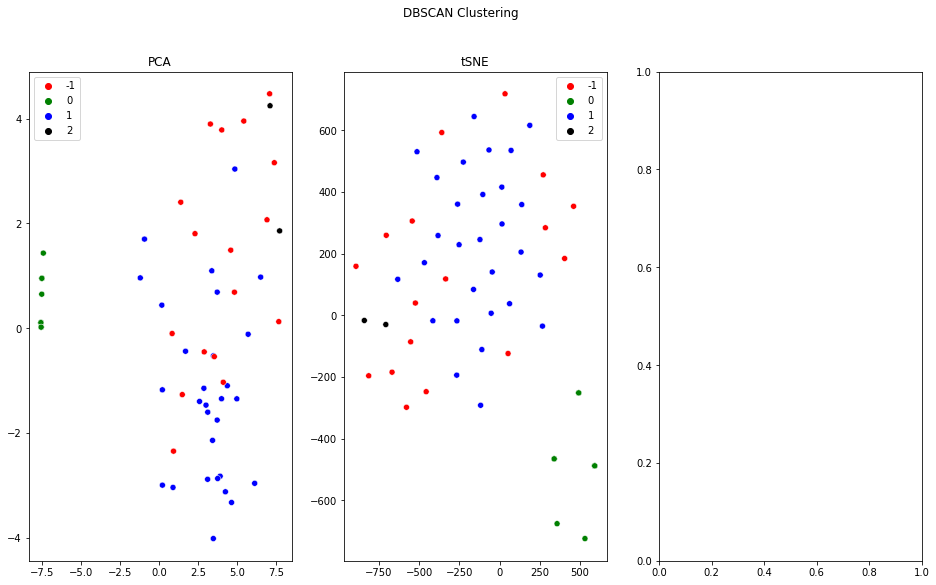

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))
fig.suptitle('DBSCAN Clustering')
sns.scatterplot(ax=axes[0], x=map_pca[:,0], y=map_pca[:,1], hue=dbscan.labels_, palette=["r", "g", "b", "k"]).set_title('PCA')
sns.scatterplot(ax=axes[1], x=map_tsne[:,0], y=map_tsne[:,1], hue=dbscan.labels_, palette=["r", "g", "b", "k"]).set_title('tSNE')
#sns.scatterplot(ax=axes[2], x=map_umap[:,0], y=map_umap[:,1], hue=dbscan.labels_, palette=["r", "g", "b", "k"]).set_title('UMAP')
plt.show()

### K-Means

In [51]:
from sklearn.cluster import KMeans

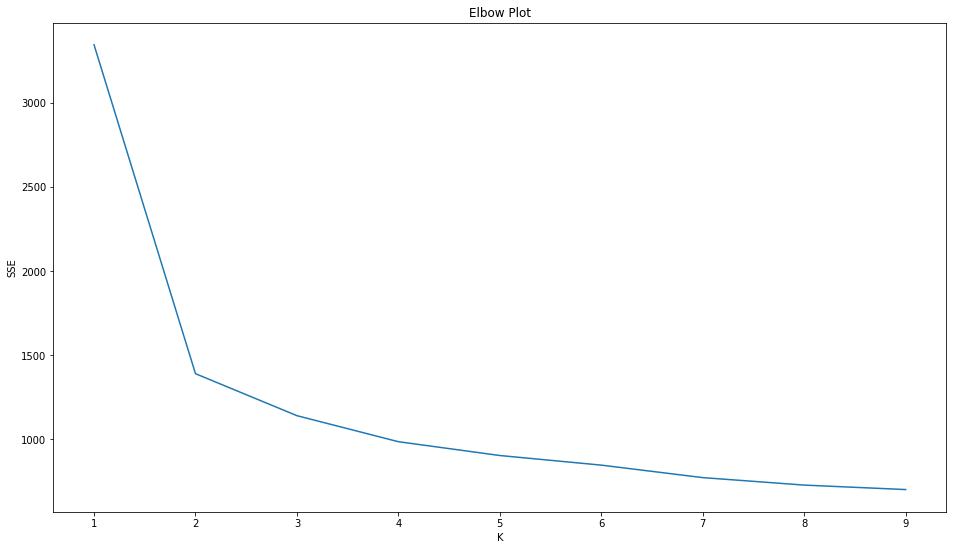

In [52]:
scores = []
for k in range(1, 10):
    kmeans = KMeans(k)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(16, 9))
plt.plot(range(1, 10), scores)
plt.title("Elbow Plot")
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

In [53]:
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [54]:
clustering_scores.append([
    'KMeans', 
    silhouette_score(X, kmeans.labels_), 
    calinski_harabasz_score(X, kmeans.labels_),
    davies_bouldin_score(X, kmeans.labels_)
])

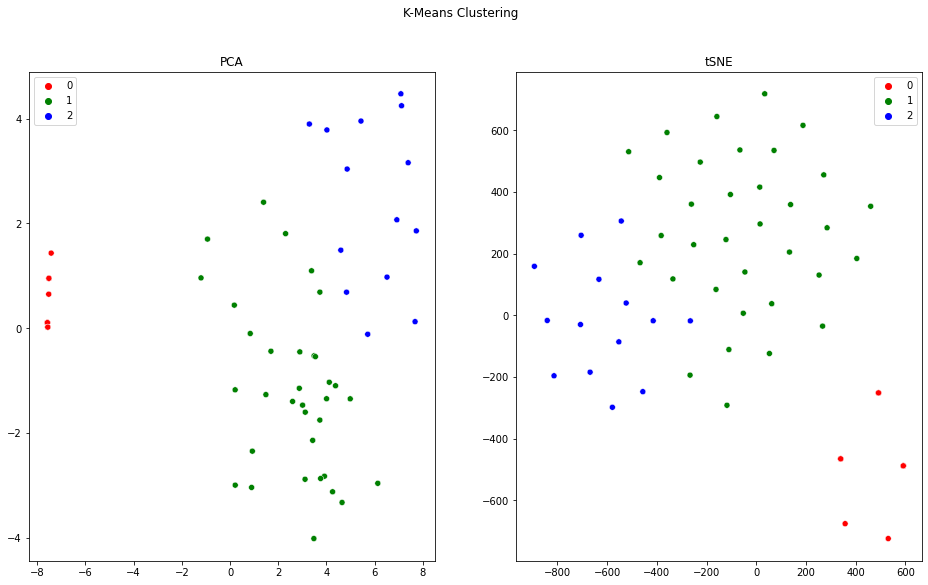

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
fig.suptitle('K-Means Clustering')
sns.scatterplot(ax=axes[0], x=map_pca[:,0], y=map_pca[:,1], hue=kmeans.labels_, palette=["r", "g", "b"]).set_title('PCA')
sns.scatterplot(ax=axes[1], x=map_tsne[:,0], y=map_tsne[:,1], hue=kmeans.labels_, palette=["r", "g", "b"]).set_title('tSNE')
#sns.scatterplot(ax=axes[2], x=map_umap[:,0], y=map_umap[:,1], hue=kmeans.labels_, palette=["r", "g", "b"]).set_title('UMAP')
plt.show()

### KModes

In [56]:
from kmodes.kmodes import KModes
kmodes = KModes(n_clusters=3)
kmodes.fit(X)

KModes(n_clusters=3, n_init=1)

In [57]:
clustering_scores.append([
    'KModes', 
    silhouette_score(X, kmodes.labels_), 
    calinski_harabasz_score(X, kmodes.labels_),
    davies_bouldin_score(X, kmodes.labels_)
])

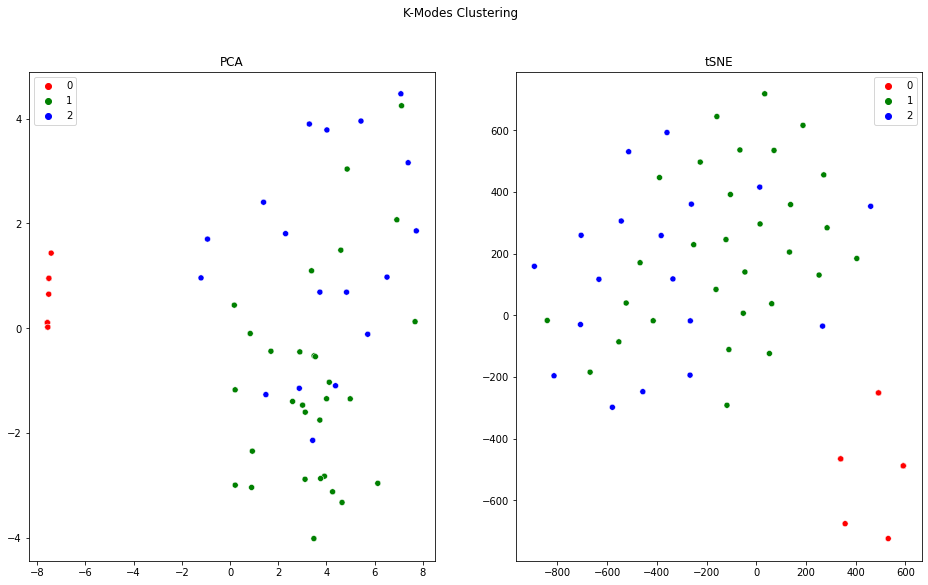

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
fig.suptitle('K-Modes Clustering')
sns.scatterplot(ax=axes[0], x=map_pca[:,0], y=map_pca[:,1], hue=kmodes.labels_, palette=["r", "g", "b"]).set_title('PCA')
sns.scatterplot(ax=axes[1], x=map_tsne[:,0], y=map_tsne[:,1], hue=kmodes.labels_, palette=["r", "g", "b"]).set_title('tSNE')
#sns.scatterplot(ax=axes[2], x=map_umap[:,0], y=map_umap[:,1], hue=kmodes.labels_, palette=["r", "g", "b"]).set_title('UMAP')
plt.show()

### Hierarchical - Agglomerative

In [59]:
from sklearn.cluster import AgglomerativeClustering

In [60]:
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward.fit(X)

AgglomerativeClustering(n_clusters=3)

In [61]:
clustering_scores.append([
    'Agglomerative - Ward Linkage', 
    silhouette_score(X, ward.labels_), 
    calinski_harabasz_score(X, ward.labels_),
    davies_bouldin_score(X, ward.labels_)
])

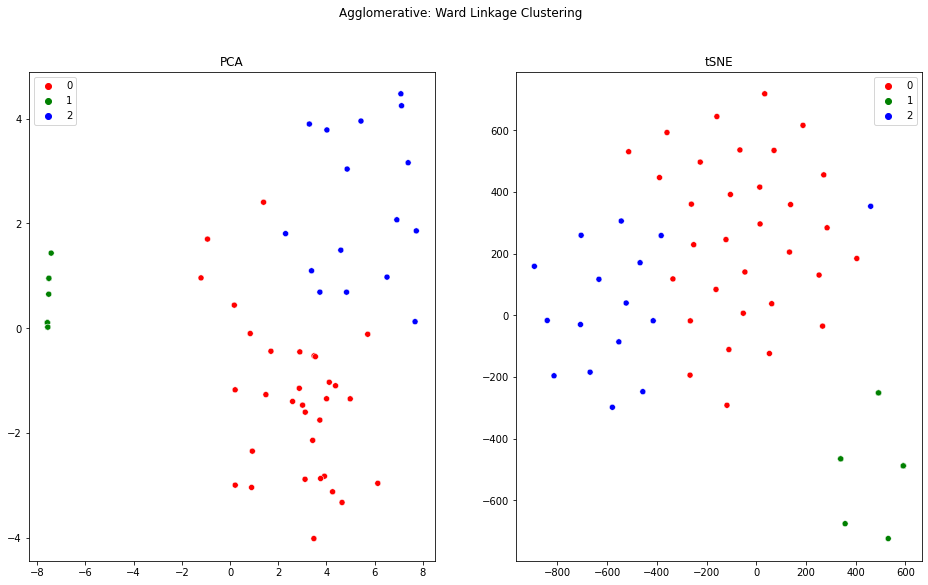

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
fig.suptitle('Agglomerative: Ward Linkage Clustering')
sns.scatterplot(ax=axes[0], x=map_pca[:,0], y=map_pca[:,1], hue=ward.labels_, palette=["r", "g", "b"]).set_title('PCA')
sns.scatterplot(ax=axes[1], x=map_tsne[:,0], y=map_tsne[:,1], hue=ward.labels_, palette=["r", "g", "b"]).set_title('tSNE')
# sns.scatterplot(ax=axes[2], x=map_umap[:,0], y=map_umap[:,1], hue=ward.labels_, palette=["r", "g", "b"]).set_title('UMAP')
plt.show()

In [63]:
X.therapist_support

0     0.0
1     0.0
2     1.0
3     0.0
4     2.0
     ... 
66    3.0
67    4.0
68    3.0
69    0.0
70    0.0
Name: therapist_support, Length: 71, dtype: float64

In [64]:
pd.DataFrame(clustering_scores, columns=['Algorithm', 'Silhouette Score', 'Calinski-Harabasz Index','Davies-Bouldin Index'])

,Algorithm,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,DBSCAN,0.330258,38.859999,2.259068
1,KMeans,0.402205,65.674779,1.433471
2,KModes,0.322073,53.099148,2.649182
3,Agglomerative - Ward Linkage,0.392873,64.882584,1.509948


<Figure size 11520x11520 with 0 Axes>

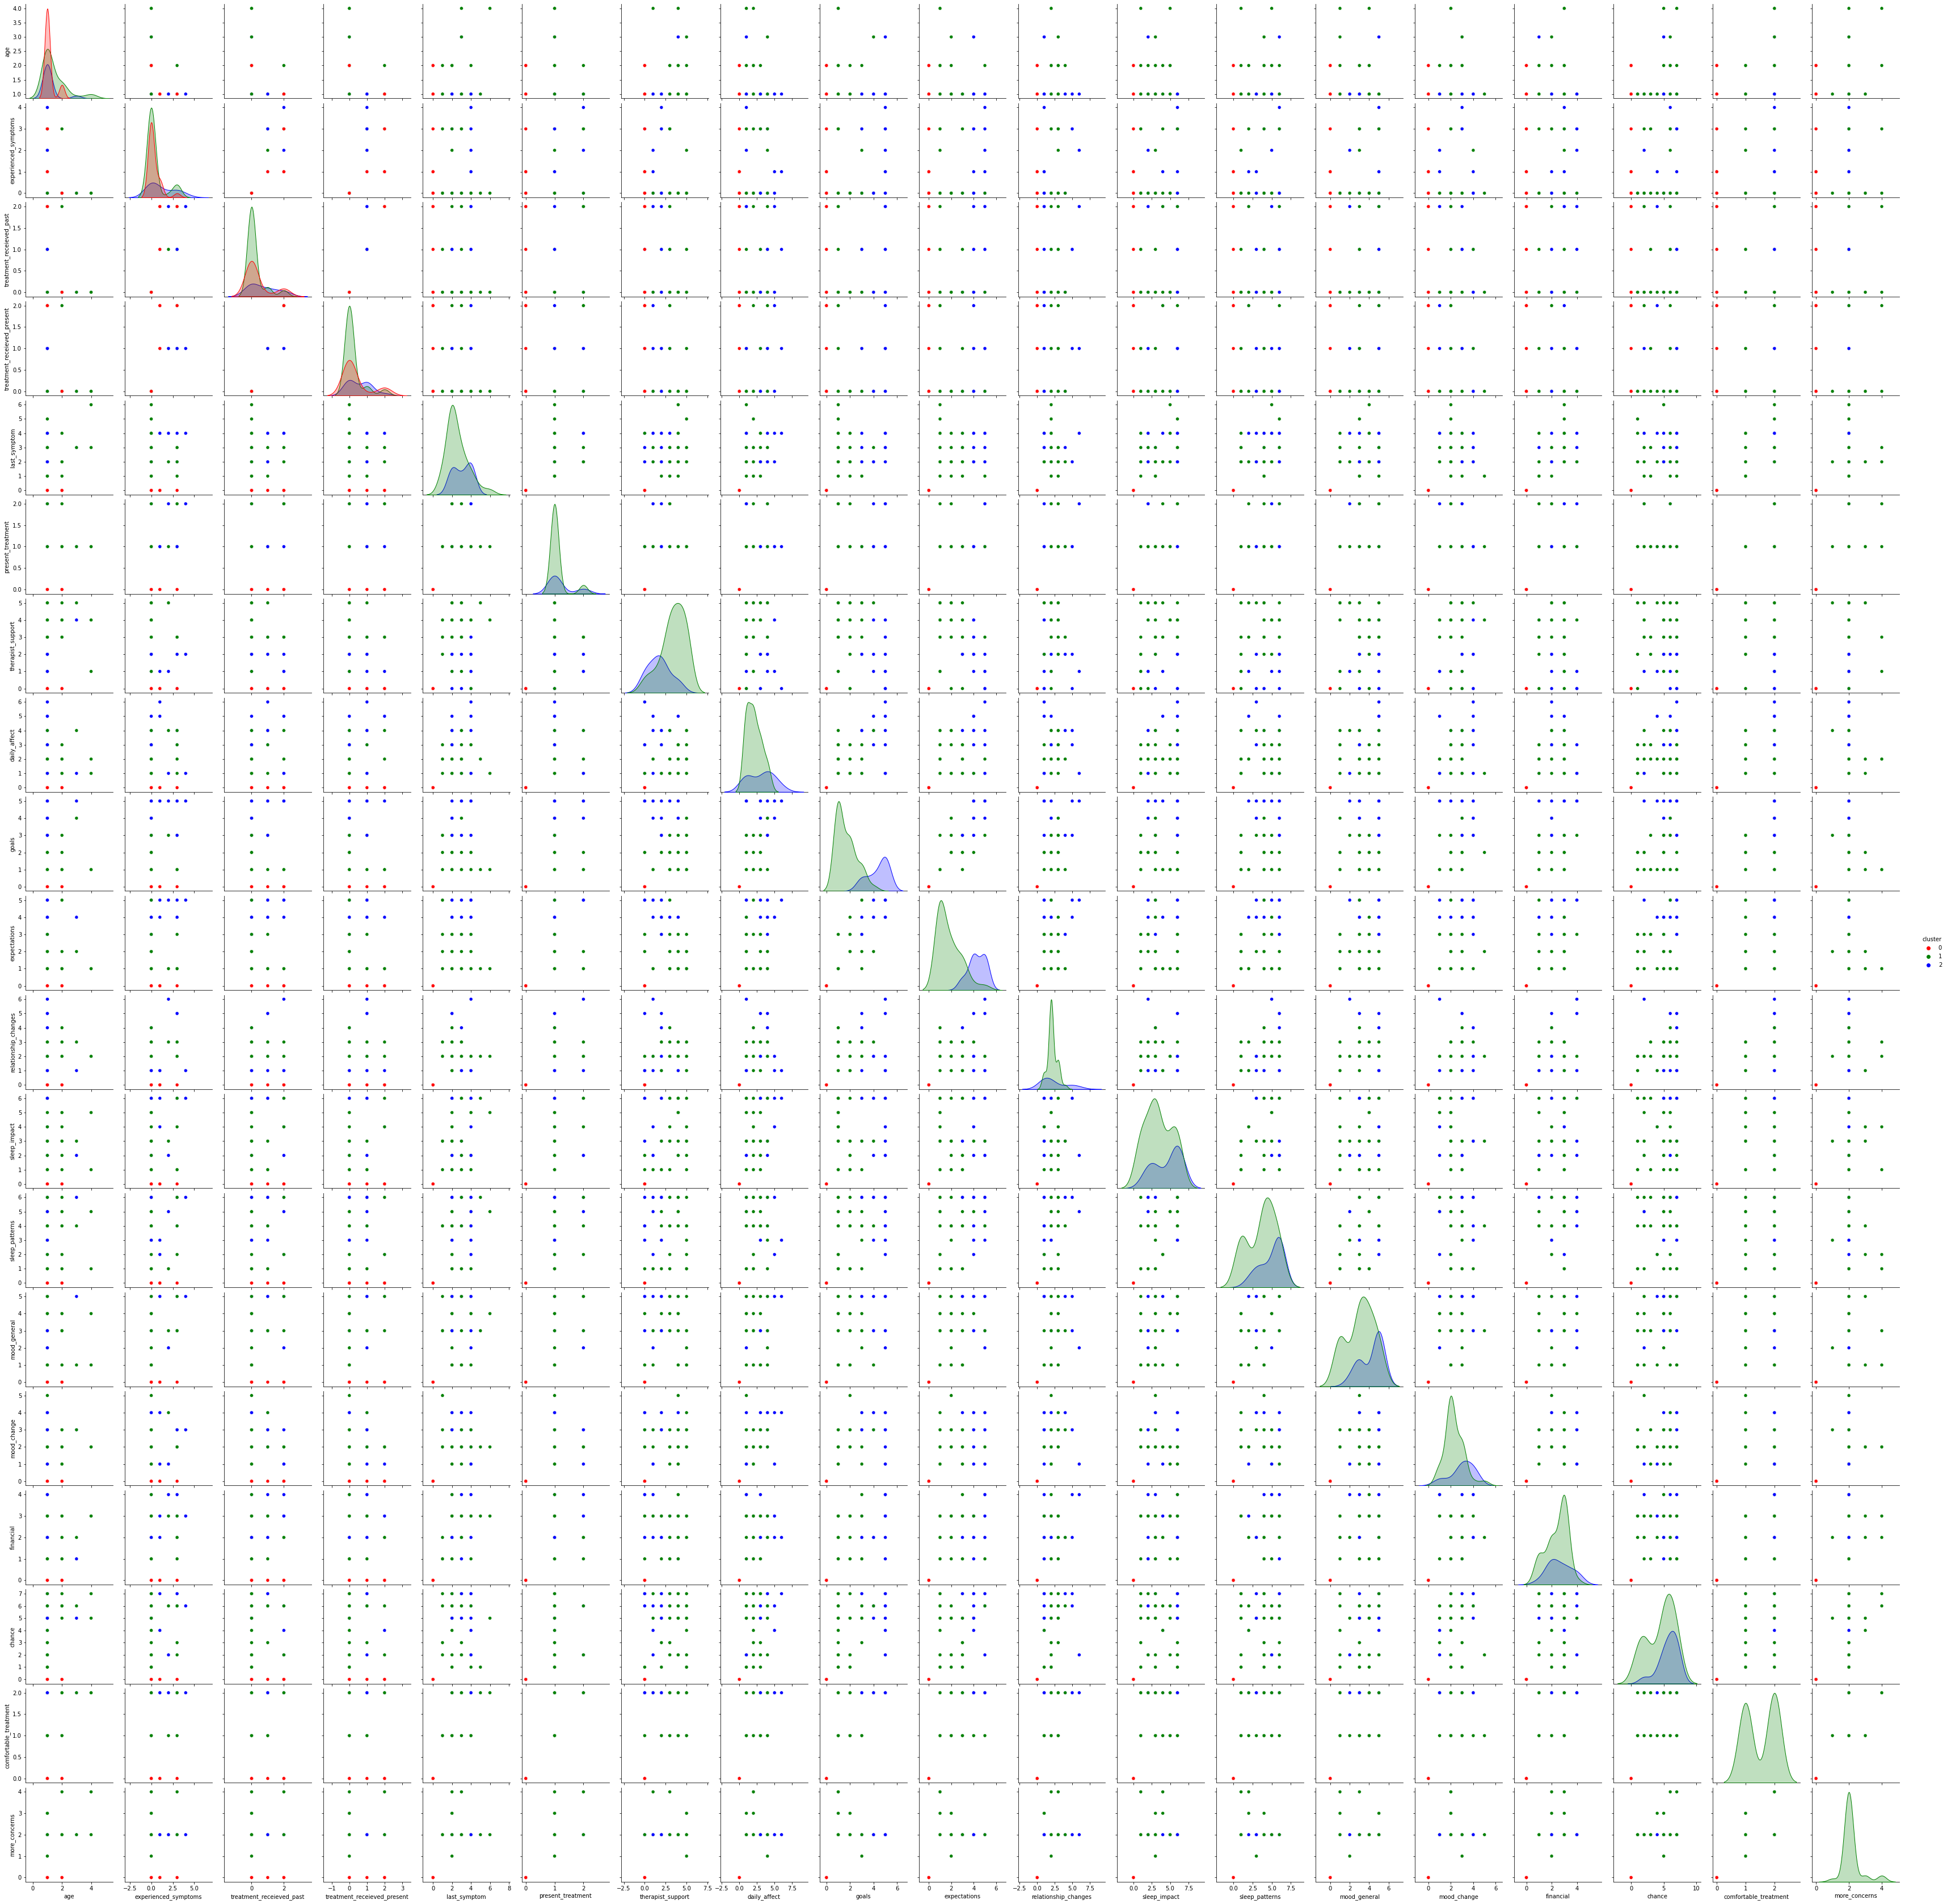

In [65]:
X_new = X.copy()
X_new['cluster'] = kmeans.labels_
plt.figure(figsize=(160, 160))
sns.pairplot(X_new, hue='cluster', palette=["r", "g", "b"])
plt.show()

In [66]:
df['cluster'] = kmeans.labels_

In [67]:
#goals_anxiety len<=2
#moderate
df[ df['cluster'] == 0]

,initials,gender,age,address,occupation,ethnicity,income,have_prev_diagnosis,felt_condition,experienced_symptoms,medication_text,treatment_receieved_past,treatment_receieved_present,daily_effect_general,mental_condition,last_symptom_ptsd,present_treatment_ptsd,therapist_support_ptsd,daily_affect_ptsd,goals_ptsd,expectations_ptsd,relationship_changes_ptsd,sleep_impact_ptsd,sleep_patterns_ptsd,mood_general_ptsd,mood_change_ptsd,general_effect_text_ptsd,financial_ptsd,chance_ptsd,cope_text_ptsd,comfortable_treatment_ptsd,helpful_treatment_text_ptsd,more_concerns_ptsd,last_symptom_anxiety,present_treatment_anxiety,therapist_support_anxiety,daily_affect_anxiety,goals_anxiety,expectations_anxiety,relationship_changes_anxiety,sleep_impact_anxiety,sleep_patterns_anxiety,mood_general_anxiety,mood_change_anxiety,general_effect_text_anxiety,financial_anxiety,chance_anxiety,cope_text_anxiety,comfortable_treatment_anxiety,helpful_treatment_text_anxiety,more_concerns_anxiety,last_symptom_trauma,present_treatment_trauma,therapist_support_trauma,daily_affect_trauma,goals_trauma,expectations_trauma,relationship_changes_trauma,sleep_impact_trauma,sleep_patterns_trauma,mood_general_trauma,mood_change_trauma,general_effect_text_trauma,financial_trauma,chance_trauma,cope_text_trauma,comfortable_treatment_trauma,helpful_treatment_text_trauma,more_concerns_trauma,history_sud,present_treatment_sud,therapist_support_sud,daily_affect_sud,goals_sud,expectations_sud,relationship_changes_sud,sleep_impact_sud,sleep_patterns_sud,mood_general_sud,mood_change_sud,legal_issue_sud,financial_sud,chance_sud,cope_text_sud,comfortable_treatment_sud,helpful_treatment_text_sud,more_concerns_sud,feeling_present_text,preferred_therapy,share_text,feedback_text,consent_agreement,provider_email,cluster
0,AD,Woman,18 - 35,"Canada,Manitoba",Student,NaN,< $30000,Yes,NaN,Daily,no,Yes,Yes,Anger,Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Talk Therapy,NaN,NaN,Yes,NaN,0
1,XV,Woman,18 - 35,"Canada,Ontario",Student,NaN,< $30000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Talk Therapy,NaN,NaN,Yes,NaN,0
3,FE,Man,18 - 35,"Canada,Ontario",Student,NaN,No income,No,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Talk Therapy,NaN,NaN,Yes,NaN,0
8,NS,Man,18 - 35,"Canada,Ontario",Student,NaN,< $30000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Talk Therapy,NaN,NaN,Yes,NaN,0
9,RN,Man,18 - 35,"Canada,Ontario",Student,NaN,No income,No,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Talk Therapy,NaN,NaN,Yes,NaN,0
11,CU,Man,18 - 35,"Canada,Ontario",Student,NaN,< $30000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [68]:
cond1 = df['cluster'] == 0  
cond2 = df['sleep_impact_anxiety'] == 'Moderately'


temp0 = df[cond1 & cond2].shape
temp0

(0, 94)

In [69]:
#NaN data, except preferred therapy is talk therapy
#not severe
df[ df['cluster'] == 1]

,initials,gender,age,address,occupation,ethnicity,income,have_prev_diagnosis,felt_condition,experienced_symptoms,medication_text,treatment_receieved_past,treatment_receieved_present,daily_effect_general,mental_condition,last_symptom_ptsd,present_treatment_ptsd,therapist_support_ptsd,daily_affect_ptsd,goals_ptsd,expectations_ptsd,relationship_changes_ptsd,sleep_impact_ptsd,sleep_patterns_ptsd,mood_general_ptsd,mood_change_ptsd,general_effect_text_ptsd,financial_ptsd,chance_ptsd,cope_text_ptsd,comfortable_treatment_ptsd,helpful_treatment_text_ptsd,more_concerns_ptsd,last_symptom_anxiety,present_treatment_anxiety,therapist_support_anxiety,daily_affect_anxiety,goals_anxiety,expectations_anxiety,relationship_changes_anxiety,sleep_impact_anxiety,sleep_patterns_anxiety,mood_general_anxiety,mood_change_anxiety,general_effect_text_anxiety,financial_anxiety,chance_anxiety,cope_text_anxiety,comfortable_treatment_anxiety,helpful_treatment_text_anxiety,more_concerns_anxiety,last_symptom_trauma,present_treatment_trauma,therapist_support_trauma,daily_affect_trauma,goals_trauma,expectations_trauma,relationship_changes_trauma,sleep_impact_trauma,sleep_patterns_trauma,mood_general_trauma,mood_change_trauma,general_effect_text_trauma,financial_trauma,chance_trauma,cope_text_trauma,comfortable_treatment_trauma,helpful_treatment_text_trauma,more_concerns_trauma,history_sud,present_treatment_sud,therapist_support_sud,daily_affect_sud,goals_sud,expectations_sud,relationship_changes_sud,sleep_impact_sud,sleep_patterns_sud,mood_general_sud,mood_change_sud,legal_issue_sud,financial_sud,chance_sud,cope_text_sud,comfortable_treatment_sud,helpful_treatment_text_sud,more_concerns_sud,feeling_present_text,preferred_therapy,share_text,feedback_text,consent_agreement,provider_email,cluster
5,IK,Man,18 - 35,"Canada,Ontario",Student,NaN,< $30000,No,Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 3 months ago,No,Did not have therapy session,Prone to more isolation,To help me relax;To be happy;,To feel relax;To be happy;,No not at all,Moderately,Moderately,Quite a bit,Overwhelmed/Stimulated;,Sleep cycle,Not at all,"Yes, I would use it daily",Grounding self in reality through thought exer...,No,Medication and counselling,Others (If you haven't been diagnosed with any...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On-demand self-guided therapy,NaN,NaN,Yes,NaN,1
6,OG,Man,18 - 35,"Canada,Ontario",Work,NaN,< $30000,No,PTSD,NaN,NaN,NaN,NaN,NaN,NaN,< 3 months ago,No,Not really,Prone to more isolation;,To be happy;,To learn coping strategies ;,No in other environments,Moderately,A little bit,A little bit,Sadness/Depressed;,Peace,Moderately,"No, I need to stay active, no I am not interes...",I don’t,No,Nothing,Others (If you haven't been diagnosed with any...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Psychological Health (Non Service Related),NaN,NaN,Yes,NaN,1
10,CU,Man,18 - 35,"Canada,Ontario",Student,NaN,No income,No,Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 3 months ago,No,Adequate,Prone to more irritability,To be happy;To help me relax;,To feel relax;To be happy;To learn coping stra...,No mostly at the workplace,A little bit,A little bit,Moderately,Sadness/Depressed;Overwhelmed/Stimulated;,Capability to concentrate,Not at all,"No, I am not interested for now",Go out in public places,No,Haven’t figured that out,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,1
13,SB,Man,18 - 35,"Canada,Ontario",Work,NaN,> $60000,No,Substance Abuse,NaN,NaN,N

In [70]:
#goals_anxiety > 2

# extreme 
df[ df['cluster'] == 2]


,initials,gender,age,address,occupation,ethnicity,income,have_prev_diagnosis,felt_condition,experienced_symptoms,medication_text,treatment_receieved_past,treatment_receieved_present,daily_effect_general,mental_condition,last_symptom_ptsd,present_treatment_ptsd,therapist_support_ptsd,daily_affect_ptsd,goals_ptsd,expectations_ptsd,relationship_changes_ptsd,sleep_impact_ptsd,sleep_patterns_ptsd,mood_general_ptsd,mood_change_ptsd,general_effect_text_ptsd,financial_ptsd,chance_ptsd,cope_text_ptsd,comfortable_treatment_ptsd,helpful_treatment_text_ptsd,more_concerns_ptsd,last_symptom_anxiety,present_treatment_anxiety,therapist_support_anxiety,daily_affect_anxiety,goals_anxiety,expectations_anxiety,relationship_changes_anxiety,sleep_impact_anxiety,sleep_patterns_anxiety,mood_general_anxiety,mood_change_anxiety,general_effect_text_anxiety,financial_anxiety,chance_anxiety,cope_text_anxiety,comfortable_treatment_anxiety,helpful_treatment_text_anxiety,more_concerns_anxiety,last_symptom_trauma,present_treatment_trauma,therapist_support_trauma,daily_affect_trauma,goals_trauma,expectations_trauma,relationship_changes_trauma,sleep_impact_trauma,sleep_patterns_trauma,mood_general_trauma,mood_change_trauma,general_effect_text_trauma,financial_trauma,chance_trauma,cope_text_trauma,comfortable_treatment_trauma,helpful_treatment_text_trauma,more_concerns_trauma,history_sud,present_treatment_sud,therapist_support_sud,daily_affect_sud,goals_sud,expectations_sud,relationship_changes_sud,sleep_impact_sud,sleep_patterns_sud,mood_general_sud,mood_change_sud,legal_issue_sud,financial_sud,chance_sud,cope_text_sud,comfortable_treatment_sud,helpful_treatment_text_sud,more_concerns_sud,feeling_present_text,preferred_therapy,share_text,feedback_text,consent_agreement,provider_email,cluster
2,CJ,Man,18 - 35,"United States,Hawaii",Student,NaN,> $60000,Yes,NaN,Daily,many medications,Yes,Yes,Anger;Grief;Annoyed;Depression;Loneliness;sadn...,PTSD,> 1 year,No,A lot,Prone to more anger;Prone to more grief;Prone ...,To help me relax;To smile again;To have better...,To feel relax;To learn coping strategies ;To h...,No mostly at the workplace,Moderately,A little bit,Quite a bit,Anger/Frustration;Happiness/Euphoric;Sadness/D...,other's health and mental health,Not at all,"No, I need to stay active, no I am not interes...",fight,Yes,financial support,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,2
4,XT,Woman,18 - 35,"Canada,Ontario",Student,NaN,< $30000,No,Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>1 year,No,Adequate,Prone to more isolation,To help me relax;To have better relationships;...,To feel relax;To learn coping strategies;To fe...,No not at all,Quite a bit,Quite a bit,Quite a bit,Sadness/Depressed;Overwhelmed/Stimulated;,the ability to be social and outgoing,Not at all,"Yes, I would use it daily",go for a walk and listen to music,Yes,one on one session,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,2
7,SB,Man,18 - 35,"Canada,Ontario",Student,NaN,$10000-$15000,Yes,NaN,Yearly,No I’m currently not taking any medication,Yes,No,Anger;Annoyed;Depression;Loneliness;Grief;,Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>1 year,Yes,Adequate,Prone to more isolation,To help me relax;To smile again;To have better...,To feel relax;To learn coping strategies;To ha...,No in other environments,Quite a bit,Quite a bit,Quite a bit,Anger/Frustration;Happiness/Euphoric;,Nothing,Not at all,"Yes, I would use it monthly",Go to the gym,Yes,Spend time with my own-self,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [71]:
cond1 = df['cluster'] == 2    
cond2 = df['sleep_impact_anxiety'] == 'Moderately'


temp2 = df[cond1 & cond2].shape
temp2

(2, 94)